In [1]:
import pandas as pd

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Function to prepare the data for training
def prepare_data(df, feature_col, target_col, test_size=0.2):
    
    # Prepare data for regression by splitting into training and test sets.
    X = df[[feature_col]]  # Independent variable 
    y = df[target_col]     # Target variable
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Function to train the linear regression model
def train_model(X_train, y_train):
    # Train a linear regression model.
    reg = LinearRegression().fit(X_train, y_train)
    return reg

# Function to evaluate the model using Mean Squared Error (MSE)
def evaluate_model(reg, X_train, y_train, X_test, y_test):
    
    # Evaluate the linear regression model using training and test data.
    
    # Predictions
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    # Calculate Mean Squared Error
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    return train_mse, test_mse

# Main function to execute the workflow
def main():
    # Load the dataset
    
    df = pd.read_csv('df_binary.csv')
    
    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df, feature_col='src_bytes', target_col='dst_bytes')
    
    # Train the model
    reg = train_model(X_train, y_train)
    
    # Evaluate the model
    train_mse, test_mse = evaluate_model(reg, X_train, y_train, X_test, y_test)
    
    # Display results
    print(f"Coefficient: {reg.coef_[0]}")
    print(f"Intercept: {reg.intercept_}")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")

# Execute the main function
if __name__ == "__main__":
    main()


Coefficient: 6.138557575809438e-05
Intercept: 3070.9049890245533
Train MSE: 5792394643.2434225
Test MSE: 16282603123.919199


In [28]:

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):

    # Calculate MSE, RMSE, MAPE, and R² score.
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R²': r2
    }

# Main function to execute the workflow
def main():
    
    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df, feature_col='src_bytes', target_col='dst_bytes')
    
    #  Train the model
    reg = train_model(X_train, y_train)
    
    #  Make predictions
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    #  Calculate metrics for both train and test sets
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    
    # Display results
    print("Training Set Metrics:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")
    
    print("\nTest Set Metrics:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")

# Execute the main function
if __name__ == "__main__":
    main()


Training Set Metrics:
MSE: 5792394643.2434225
RMSE: 76107.78306614523
MAPE: 7.455910311747753e+18
R²: 4.718983635410012e-06

Test Set Metrics:
MSE: 16282603123.919199
RMSE: 127603.3037343438
MAPE: 7.467580287598327e+18
R²: -0.00025421292130412


In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Function to prepare the data for training
def prepare_data(df, feature_cols, target_col, test_size=0.2):
  
    # Prepare data for regression by splitting into training and test sets.

    X = df[feature_cols]  # Independent variables (multiple features)
    y = df[target_col]    # Target variable
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Function to train the linear regression model
def train_model(X_train, y_train):
    """
    Train a linear regression model.
    :param X_train: Training data (features)
    :param y_train: Training data (target)
    :return: Trained LinearRegression model
    """
    reg = LinearRegression().fit(X_train, y_train)
    return reg

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):

    # Calculate MSE, RMSE, MAPE, and R² score.

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R²': r2
    }

# Main function to execute the workflow
def main():

    # Define the features and target column
    # Choose multiple columns for features (e.g., using all numerical columns except the target)
    feature_cols = df.select_dtypes(include=[np.number]).columns.drop('dst_bytes')  # Exclude target column
    target_col = 'dst_bytes'
    
    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df, feature_cols=feature_cols, target_col=target_col)
    
    # Train the model
    reg = train_model(X_train, y_train)
    
    # Make predictions
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    # Calculate metrics for both train and test sets
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    
    # Display results
    print("Training Set Metrics:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")
    
    print("\nTest Set Metrics:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")

# Execute the main function
if __name__ == "__main__":
    main()


Training Set Metrics:
MSE: 5742289454.57089
RMSE: 75777.89555385456
MAPE: 8.627905085684831e+18
R²: 0.008654846489262402

Test Set Metrics:
MSE: 16120898994.852764
RMSE: 126968.10227318027
MAPE: 8.441538059785249e+18
R²: 0.009679409799492111


In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans



# Function to prepare the data for clustering (excluding the target variable)
def prepare_data_for_clustering(df, feature_cols, test_size=0.2):

    # Prepare data for clustering by splitting into training and test sets, excluding the target variable.

    X = df[feature_cols]  # Use only independent variables for clustering
    return train_test_split(X, test_size=test_size, random_state=42)

# Function to perform K-means clustering
def perform_kmeans(X_train, n_clusters=2):
    
    # Perform K-means clustering on the training data.
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X_train)
    labels = kmeans.labels_  # Cluster labels for the training data
    cluster_centers = kmeans.cluster_centers_  # Coordinates of cluster centers
    return kmeans, labels, cluster_centers

# Main function to execute the workflow
def main():

    # Define the feature columns (ignore the target variable for clustering)
    feature_cols = df.select_dtypes(include=[float, int]).columns.drop('dst_bytes')  # Exclude target column
    
    # Prepare the data for clustering
    X_train, X_test = prepare_data_for_clustering(df, feature_cols)
    
    # Perform K-means clustering (k=2)
    kmeans, labels, cluster_centers = perform_kmeans(X_train, n_clusters=2)
    
    # Display the cluster labels and cluster centers
    print("Cluster Labels (for training data):")
    print(labels)
    
    print("\nCluster Centers:")
    print(cluster_centers)

# Execute the main function
if __name__ == "__main__":
    main()


Cluster Labels (for training data):
[0 0 0 ... 0 0 0]

Cluster Centers:
[[3.18150457e+02 8.64345986e+03 9.92457324e-05 2.45633188e-02
  4.96228662e-05 1.98789202e-01 9.42834458e-04 3.93807066e-01
  2.65581580e-01 1.58793172e-03 1.38944025e-03 2.94958317e-01
  1.66236602e-02 3.96982930e-04 4.86304089e-03 0.00000000e+00
  0.00000000e+00 9.27947598e-03 8.38031461e+01 2.74907701e+01
  2.84141028e-01 2.81418718e-01 1.19161374e-01 1.20815800e-01
  6.61628126e-01 6.29461096e-02 9.71447003e-02 1.82737743e+02
  1.14923630e+02 5.19145990e-01 8.25317586e-02 1.47957523e-01
  3.18613537e-02 2.83953950e-01 2.77866217e-01 1.18342596e-01
  1.19194125e-01]
 [3.56820000e+04 3.81709090e+08 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000

In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#
# Function to prepare the data for clustering (excluding the target variable)
def prepare_data_for_clustering(df, feature_cols, test_size=0.2):
    
    # Prepare data for clustering by splitting into training and test sets, excluding the target variable.
  
    X = df[feature_cols]  # Use only independent variables for clustering
    return train_test_split(X, test_size=test_size, random_state=42)

# Function to perform K-means clustering
def perform_kmeans(X_train, n_clusters=2):
    
    # Perform K-means clustering on the training data.
  
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(X_train)
    return kmeans

# Function to calculate clustering evaluation metrics
def evaluate_clustering(X_train, labels):
    
    # Calculate Silhouette Score, Calinski-Harabasz (CH) Score, and Davies-Bouldin (DB) Index.
   
    silhouette = silhouette_score(X_train, labels)
    ch_score = calinski_harabasz_score(X_train, labels)
    db_index = davies_bouldin_score(X_train, labels)
    
    return silhouette, ch_score, db_index

# Main function to execute the workflow
def main():
  
    
    #  Define the feature columns (ignore the target variable for clustering)
    feature_cols = df.select_dtypes(include=[float, int]).columns.drop('dst_bytes')  # Exclude target column
    
    # Prepare the data for clustering
    X_train, X_test = prepare_data_for_clustering(df, feature_cols)
    
    # Perform K-means clustering (k=2)
    kmeans = perform_kmeans(X_train, n_clusters=2)
    
    # Evaluate the clustering using the metrics
    silhouette, ch_score, db_index = evaluate_clustering(X_train, kmeans.labels_)
    
    # Display the evaluation metrics
    print(f"Silhouette Score: {silhouette}")
    print(f"Calinski-Harabasz Score: {ch_score}")
    print(f"Davies-Bouldin Index: {db_index}")

# Execute the main function
if __name__ == "__main__":
    main()


Silhouette Score: 0.999903523402963
Calinski-Harabasz Score: 5854056.384722539
Davies-Bouldin Index: 4.359441966019605e-05


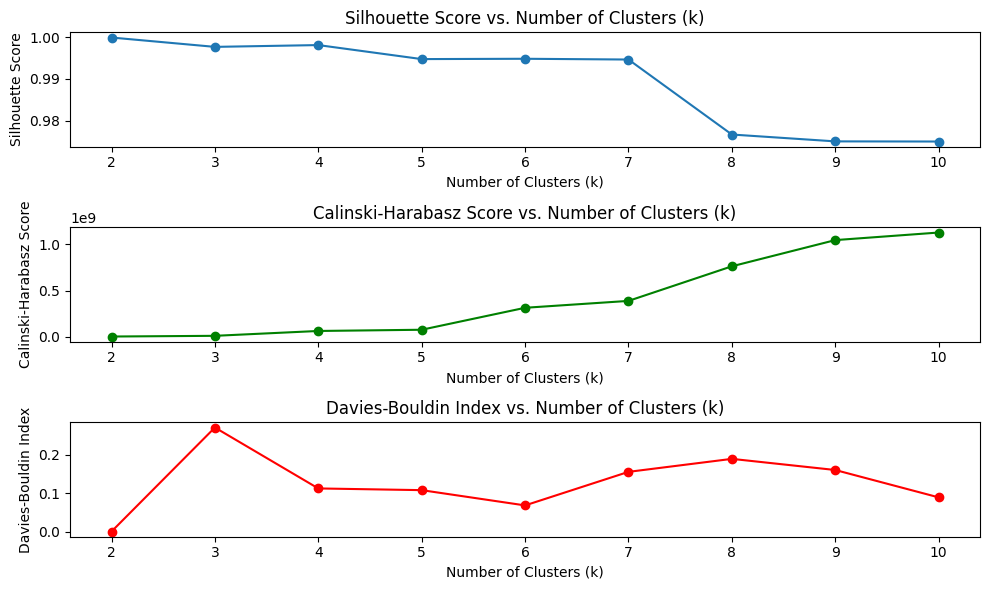

In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# Function to prepare the data for clustering (excluding the target variable)
def prepare_data_for_clustering(df, feature_cols):
    
    # Prepare data for clustering, excluding the target variable.
    
    return df[feature_cols]

# Function to perform K-means clustering for a given k
def perform_kmeans(X_train, n_clusters):
    
    # Perform K-means clustering on the training data.
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(X_train)
    return kmeans

# Function to calculate clustering evaluation metrics
def evaluate_clustering(X_train, labels):
    
    # Calculate Silhouette Score, Calinski-Harabasz (CH) Score, and Davies-Bouldin (DB) Index.
   
    silhouette = silhouette_score(X_train, labels)
    ch_score = calinski_harabasz_score(X_train, labels)
    db_index = davies_bouldin_score(X_train, labels)
    
    return silhouette, ch_score, db_index

# Function to perform clustering and evaluation for different k values
def evaluate_for_multiple_k(X_train, k_values):
    
    # Perform K-means clustering for multiple values of k and evaluate metrics.
  
    results = {
        'k': [],
        'Silhouette': [],
        'Calinski-Harabasz': [],
        'Davies-Bouldin': []
    }
    
    for k in k_values:
        kmeans = perform_kmeans(X_train, n_clusters=k)
        silhouette, ch_score, db_index = evaluate_clustering(X_train, kmeans.labels_)
        
        # Append the results
        results['k'].append(k)
        results['Silhouette'].append(silhouette)
        results['Calinski-Harabasz'].append(ch_score)
        results['Davies-Bouldin'].append(db_index)
    
    return results

# Function to plot the metrics against the k values
def plot_results(results):
    
    # Plot the clustering evaluation metrics against the k values.
   
    k_values = results['k']
    
    # Plot Silhouette Score
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 1, 1)
    plt.plot(k_values, results['Silhouette'], marker='o')
    plt.title('Silhouette Score vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    
    # Plot Calinski-Harabasz Score
    plt.subplot(3, 1, 2)
    plt.plot(k_values, results['Calinski-Harabasz'], marker='o', color='g')
    plt.title('Calinski-Harabasz Score vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Calinski-Harabasz Score')
    
    # Plot Davies-Bouldin Index
    plt.subplot(3, 1, 3)
    plt.plot(k_values, results['Davies-Bouldin'], marker='o', color='r')
    plt.title('Davies-Bouldin Index vs. Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    
    plt.tight_layout()
    plt.show()

# Main function to execute the workflow
def main():
 
    # Define the feature columns (ignore the target variable for clustering)
    feature_cols = df.select_dtypes(include=[float, int]).columns.drop('dst_bytes')  # Exclude target column
    
    # Prepare the data for clustering
    X_train = prepare_data_for_clustering(df, feature_cols)
    
    # Define the range of k values to test
    k_values = range(2, 11)  # Test k values from 2 to 10
    
    # Perform K-means clustering for different values of k and evaluate metrics
    results = evaluate_for_multiple_k(X_train, k_values)
    
    # Plot the evaluation metrics against the k values
    plot_results(results)

# Execute the main function
if __name__ == "__main__":
    main()


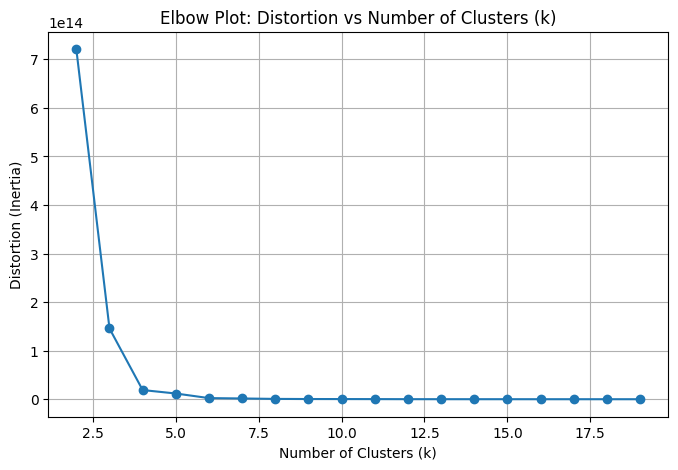

In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Function to prepare the data for clustering (excluding the target variable)
def prepare_data_for_clustering(df, feature_cols):
    
    # Prepare data for clustering, excluding the target variable.
    
    return df[feature_cols]

# Function to calculate distortions (inertia) for different k values and plot the elbow plot
def elbow_method(X_train, k_range):
    
    # Perform K-means clustering for a range of k values and plot the elbow plot using inertia.
    distortions = []
    
    # Iterate over the range of k values and calculate the inertia (distortion)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
        distortions.append(kmeans.inertia_)
    
    # Plot the elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, distortions, marker='o')
    plt.title('Elbow Plot: Distortion vs Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.grid(True)
    plt.show()

# Main function to execute the workflow
def main():

    
    # \Define the feature columns (ignore the target variable for clustering)
    feature_cols = df.select_dtypes(include=[float, int]).columns.drop('dst_bytes')  # Exclude target column
    
    # Prepare the data for clustering
    X_train = prepare_data_for_clustering(df, feature_cols)
    
    # Define the range of k values to test for the elbow method
    k_range = range(2, 20)  # Test k values from 2 to 19
    
    #  Perform K-means clustering for different k values and plot the elbow plot
    elbow_method(X_train, k_range)

# Execute the main function
if __name__ == "__main__":
    main()
